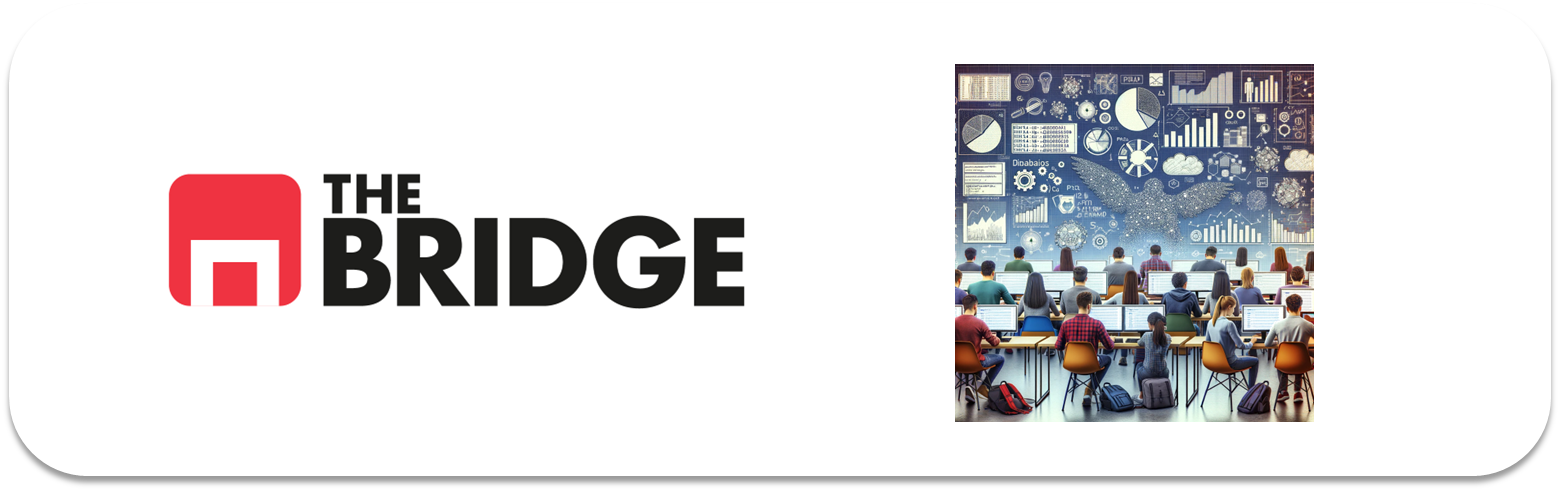

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [78]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

from sklearn.model_selection import train_test_split

In [79]:
#1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.

boston_df = pd.read_csv('data/obligatoria_hard.csv', delimiter='|')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [80]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [81]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [82]:
#2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
target = 'MEDV'

Variable Target = ***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

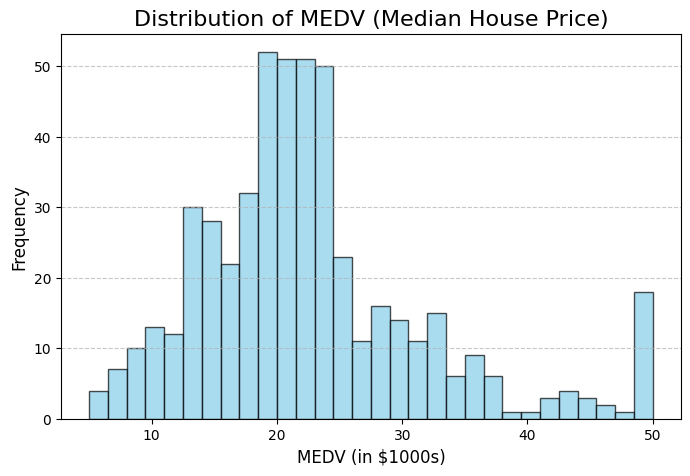

In [83]:
# Analyze the target variable (MEDV) graphically to check its distribution
plt.figure(figsize=(8, 5))
plt.hist(boston_df['MEDV'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of MEDV (Median House Price)', fontsize=16)
plt.xlabel('MEDV (in $1000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='MEDV', ylabel='Count'>

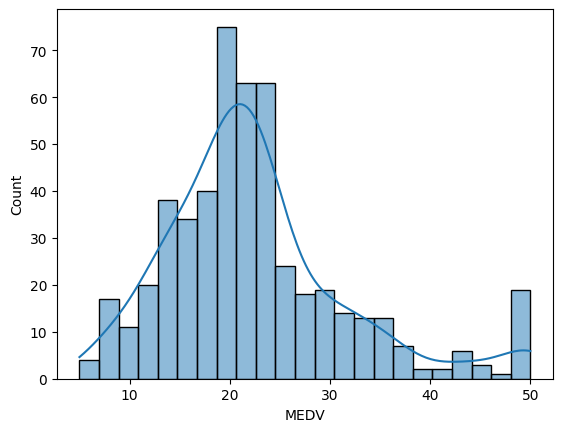

In [84]:
sns.histplot(x=target, data = boston_df, kde = True)

In [85]:
# 3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.

train_set, test_set = train_test_split(boston_df, test_size=0.2, random_state=42)
train_set.shape, test_set.shape


((404, 13), (102, 13))

In [86]:
# 4. Construye las parejas X,y de train y test
target = "MEDV"

X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]


In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


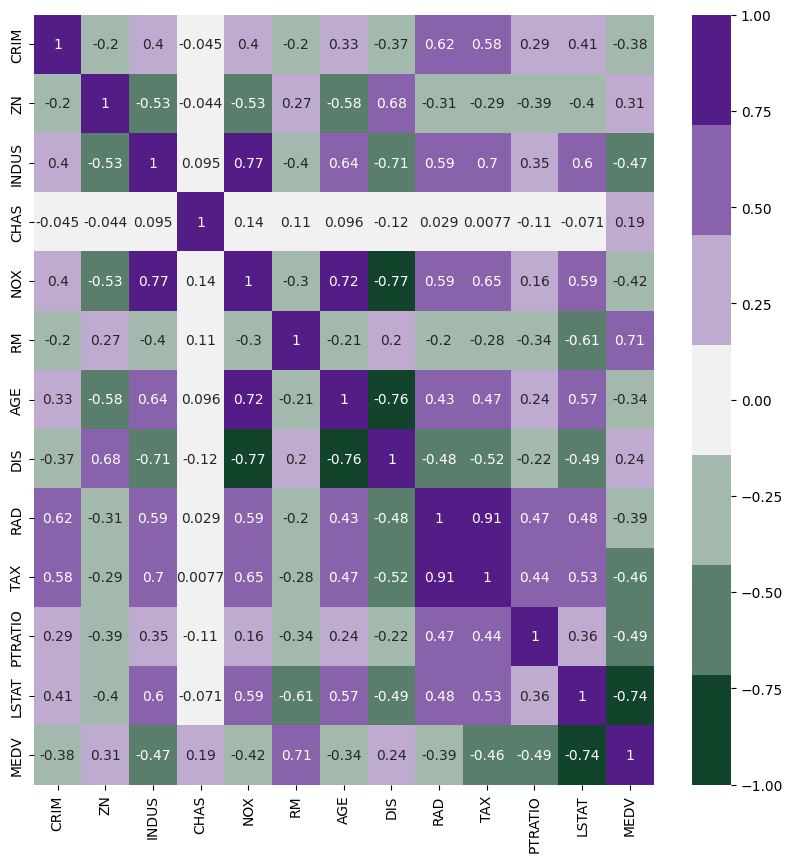

In [88]:
#5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

plt.figure(figsize=(10,10))
sns.heatmap(train_set.corr(),
           vmin=-1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

In [93]:
corr = boston_df.corr()

In [94]:
corr[target].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [95]:
criterio_col = 0.7
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

NameError: name 'features_num' is not defined

Las variables más correlacionadas con MEDV son RM (Average number of rooms per dwelling) y ZN (Proportion of residential land zoned for large lots)

Correlaciones negativas: 

- LSTAT (-0.74): Percentage of lower status population.
- PTRATIO (-0.49): Pupil-teacher ratio by town.
- TAX (-0.46): Property tax rate.
- INDUS (-0.47): Proportion of non-retail business acres per town.

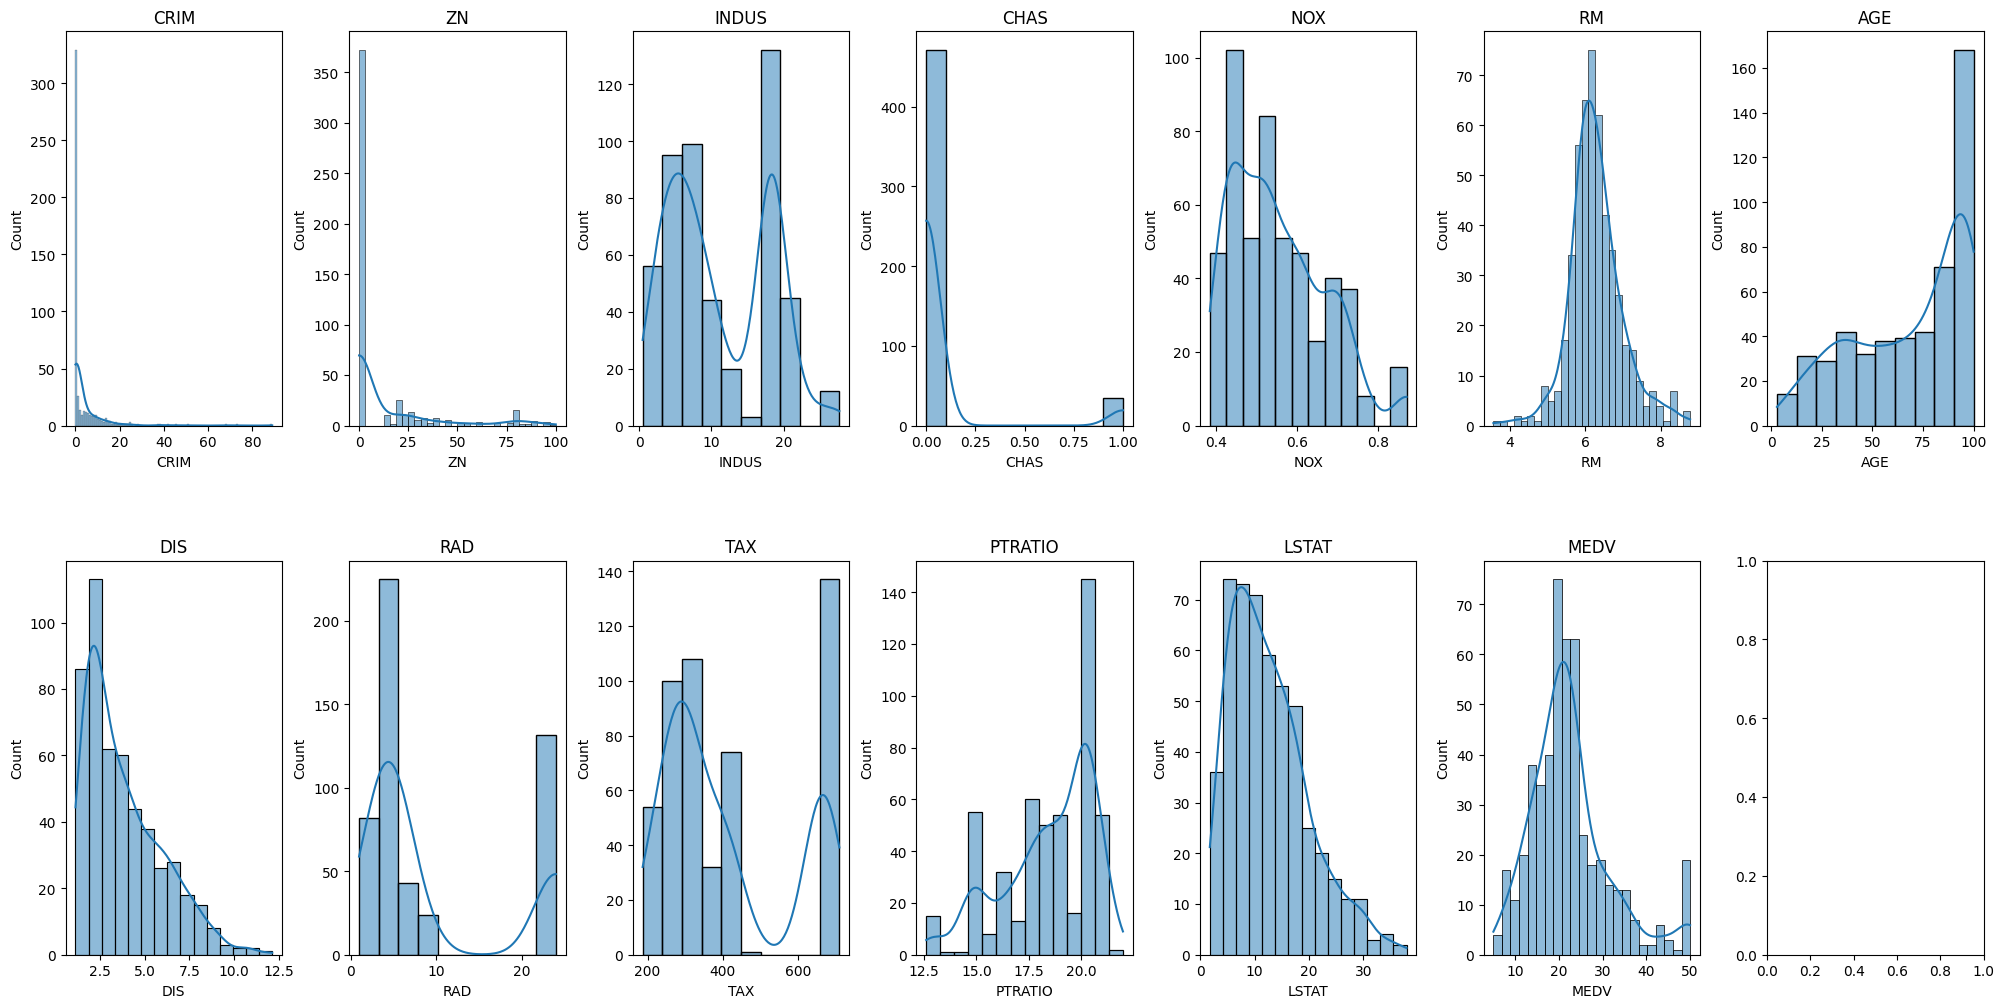

In [36]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k, v in boston_df.items():
    sns.histplot(v, kde=True, ax=axs[index])  
    axs[index].set_title(k)  
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

RM, PTRATIO - almost normal distibution;

ZN, LSTAT, TAX, INDUS - skewed distribution


In [66]:
#6. Trata las variables para que funcionen lo mejor posible en el modelo.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.638154e-17,0.000000,-4.177077e-17,1.319077e-17,-5.111423e-16,-2.616169e-16,-4.858600e-16,5.248827e-17,-9.453384e-17,-1.516938e-16,8.519038e-16,-1.791746e-16
std,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-0.500320,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-1.510559e+00
25%,-3.979761e-01,-0.500320,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,-8.005057e-01
50%,-3.776748e-01,-0.500320,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,-2.157763e-01
75%,-4.582119e-02,0.364589,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,5.513070e-01
max,9.630689e+00,3.824227,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,3.592534e+00


In [67]:
#7. Construye un modelo de regresión lineal.
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test_scaled)

# Evaluate the model
print('MAE test:', mean_absolute_error(y_test, y_pred))
print('MSE test:', mean_squared_error(y_test, y_pred))
print('RMSE test:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 test:', lin_reg.score(X_test_scaled, y_test))

# Predictions on the train set
pred_train = lin_reg.predict(X_train_scaled)
print('MAE train:', mean_absolute_error(y_train, pred_train))
print('MSE train:', mean_squared_error(y_train, pred_train))
print('RMSE train:', np.sqrt(mean_squared_error(y_train, pred_train)))
print('R2 train:', lin_reg.score(X_train_scaled, y_train))


MAE test: 3.111377388238188
MSE test: 22.77770856386605
RMSE test: 4.772599769922683
R2 test: 0.6893967884614758
MAE train: 3.424468775949534
MSE train: 22.60428647941742
RMSE train: 4.754396542087904
R2 train: 0.739801993681731


In [ ]:
#8. Analiza si lo crees conveniente los pesos y la importancia de las features.


9. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.


1. MAE (Mean Absolute Error)
	•	Test MAE: 3.11
	•	Train MAE: 3.42
	•	The model’s predictions deviate from the actual MEDV values by about $3,110 in the test set and $3,420 in the training set. These relatively low errors suggest that the model has a decent accuracy in predicting the target variable.

2. MSE (Mean Squared Error)
	•	Test MSE: 22.78
	•	Train MSE: 22.60
	•	In MSE larger errors are penalized more heavily. The values for both test and train sets are close, indicating that the model generalizes well and is not overfitting. 

3. RMSE (Root Mean Squared Error)
	•	Test RMSE: 4.77
	•	Train RMSE: 4.75
	•	The model’s typical error is around $4,770 on the test set and $4,750 on the training set. 
4. R² (Coefficient of Determination)
	•	Test R²: 0.689
	•	Train R²: 0.740
	•	R² measures the proportion of variance in the target variable (MEDV). On the training set, the model explains about 74% of the variance, while on the test set, it explains around 69%. 



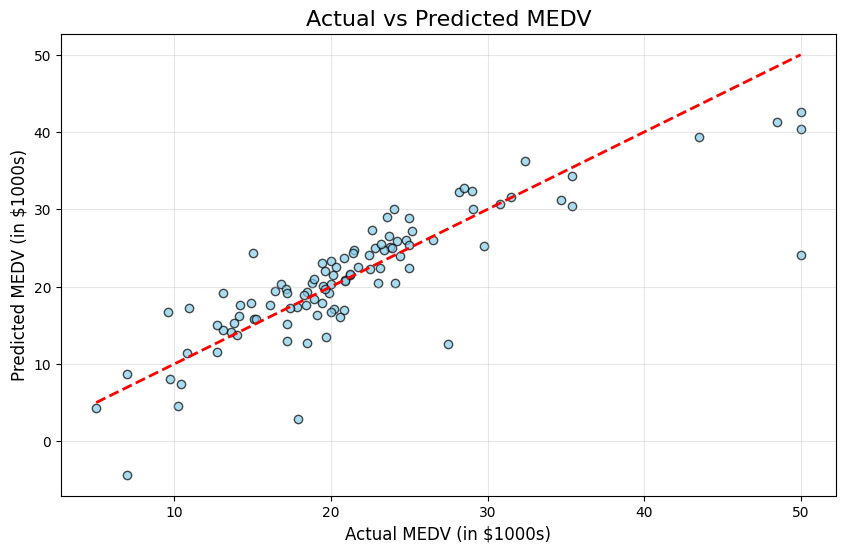

In [70]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted MEDV', fontsize=16)
plt.xlabel('Actual MEDV (in $1000s)', fontsize=12)
plt.ylabel('Predicted MEDV (in $1000s)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

In [71]:
# Ridge regularization with alpha = 10
ridgeR = Ridge(alpha=10)
ridgeR.fit(X_train_scaled, y_train)

# Predictions
y_train_ridge = ridgeR.predict(X_train_scaled)
y_test_ridge = ridgeR.predict(X_test_scaled)

# Evaluate and compare with unregularized model (Linear Regression)
train_mse_no_reg = mean_squared_error(y_train, lin_reg.predict(X_train_scaled))
test_mse_no_reg = mean_squared_error(y_test, lin_reg.predict(X_test_scaled))
train_mse_ridge = mean_squared_error(y_train, y_train_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_ridge)

# Print results
print("Train MSE sin regularización:", round(train_mse_no_reg, 2))
print("Test MSE sin regularización:", round(test_mse_no_reg, 2))
print("Train MSE con regularización Ridge:", round(train_mse_ridge, 2))
print("Test MSE con regularización Ridge:", round(test_mse_ridge, 2))

Train MSE sin regularización: 22.6
Test MSE sin regularización: 22.78
Train MSE con regularización Ridge: 22.69
Test MSE con regularización Ridge: 23.09


In [72]:
from sklearn.linear_model import Lasso

# Lasso regularization with alpha = 0.1
lassoR_01 = Lasso(alpha=0.1, max_iter=10000)
lassoR_01.fit(X_train_scaled, y_train)

# Predictions
y_train_lasso_01 = lassoR_01.predict(X_train_scaled)
y_test_lasso_01 = lassoR_01.predict(X_test_scaled)

# Evaluate Lasso (alpha=0.1)
train_mse_lasso_01 = mean_squared_error(y_train, y_train_lasso_01)
test_mse_lasso_01 = mean_squared_error(y_test, y_test_lasso_01)

print("Lasso Regularization (alpha=0.1)")
print("Train MSE sin regularización:", round(train_mse_no_reg, 2))
print("Test MSE sin regularización:", round(test_mse_no_reg, 2))
print("Train MSE: %0.4f" % train_mse_lasso_01)
print("Test MSE: %0.4f" % test_mse_lasso_01)

# Lasso regularization with alpha = 0.02
lassoR_002 = Lasso(alpha=0.02, max_iter=10000)
lassoR_002.fit(X_train_scaled, y_train)

# Predictions
y_train_lasso_002 = lassoR_002.predict(X_train_scaled)
y_test_lasso_002 = lassoR_002.predict(X_test_scaled)

# Evaluate Lasso (alpha=0.02)
train_mse_lasso_002 = mean_squared_error(y_train, y_train_lasso_002)
test_mse_lasso_002 = mean_squared_error(y_test, y_test_lasso_002)

print("\nLasso Regularization (alpha=0.02)")
print("Train MSE: %0.4f" % train_mse_lasso_002)
print("Test MSE: %0.4f" % test_mse_lasso_002)

Lasso Regularization (alpha=0.1)
Train MSE sin regularización: 22.6
Test MSE sin regularización: 22.78
Train MSE: 23.0894
Test MSE: 24.4136

Lasso Regularization (alpha=0.02)
Train MSE: 22.6317
Test MSE: 22.9482


11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

Ridge Regularization slightly increased both the training and test MSE values. This is expected, as Ridge introduces a penalty on large coefficients, which can slightly reduce model flexibility and fit. The difference between training and test MSE remains small, indicating the model is not overfitting even with regularization.

Ridge regularization (with alpha = 10 ) led to slightly better performance on the test set compared to Lasso, as Ridge retains all features, whereas Lasso potentially eliminates some features by setting their coefficients to zero.

I'd keep the **Ridge** regularization model. 